In [11]:
import polars as pl
from schema import *
from plot_utils.custom_plot_horizontal_bars_001 import *
from datetime import datetime
from schema import *
from dateutil.relativedelta import relativedelta

operations = pl.read_parquet("operations.parquet").sort(datetime_cn)
operations

datetime,amount,description,debt,ope_source,ope_type
datetime[μs],f64,str,f64,str,str
2024-06-05 00:00:00,47040.0,null,0.0,"""loan""","""down payment"""
2024-06-05 00:00:00,-4640.0,null,0.0,"""loan""","""extended guarantee"""
2024-06-05 00:00:00,-11057.2,null,null,"""loan""","""car_insurance_cn"""
2024-06-05 00:00:00,-4200.0,null,null,"""loan""","""live_insurance_cn"""
2024-06-05 00:00:00,-7500.0,null,null,"""loan""","""accessories"""
…,…,…,…,…,…
2025-03-24 00:00:00,3000.0,null,92717.91,"""busyness""","""inflow"""
2025-03-28 00:00:00,1203.29,null,89970.51,"""busyness""","""monthly_payment"""
2025-03-28 00:00:00,1366.84,null,89970.51,"""busyness""","""monthly_interests"""


In [12]:
# pl.concat([operations, pl.DataFrame([
#     {
#         datetime_cn: datetime(year=2025, month=3, day=28),
#         amount_cn: 1_203.29,
#         description_cn: None,
#         debt_cn: 59_970.51 + 30_000,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: monthly_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=28),
#         amount_cn: 1_366.84,
#         description_cn: None,
#         debt_cn: 59_970.51 + 30_000,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: monthly_interests_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=28),
#         amount_cn: 218.69,
#         description_cn: None,
#         debt_cn: 59_970.51 + 30_000,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: monthly_taxes_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=28),
#         amount_cn: 30_000,
#         description_cn: None,
#         debt_cn: 59_970.51,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: capital_repayment_cv,
#     },
# ])]).sort(datetime_cn).write_parquet("operations.parquet")

In [13]:


start_date = operations[datetime_cn].min()
end_date = start_date + relativedelta(years=5)

operation_days = operations[datetime_cn].max() - start_date
car_cash_price = 235_000.0
debt = 59_970.51

depreciation_5y_rate = 0.46
operation_years = operation_days.days / (end_date - start_date).days
car_depreciation = car_cash_price * depreciation_5y_rate * operation_years

y_ticks_map = {
    car_insurance_cn: "Seguro daños",
    monthly_interests_cv: "Intereses",
    life_insurance_cn: "Seguro de vida",
    maintenance_cv: "Mantenimientos y/o Servicios",
    business_expenses_cv: "Gastos de operaciones",
    extended_guarantee_cv: "Garantía extendida",
    car_gps_cv: "Zeek (GPS/Localizador)",
    taxes_cv: "Impuestos",
    monthly_payment_cv: "Pago mensual",
    monthly_taxes_cv: "Impuestos mensuales",
    down_payment_cv: "Enganche",
    profit_cv: "Ganancias",
    revenue_cv: "Ingresos",
    capital_repayment_cv: "Abono a capital",
    purchase_value_cv: "Precio de compra",
    depreciation_cv: "Depreciación",
    'profit': "Ganancia",
    'expense': "Gasto",
    accessories_cv: "Accesorios",
    debt_cn: "Deuda",
}

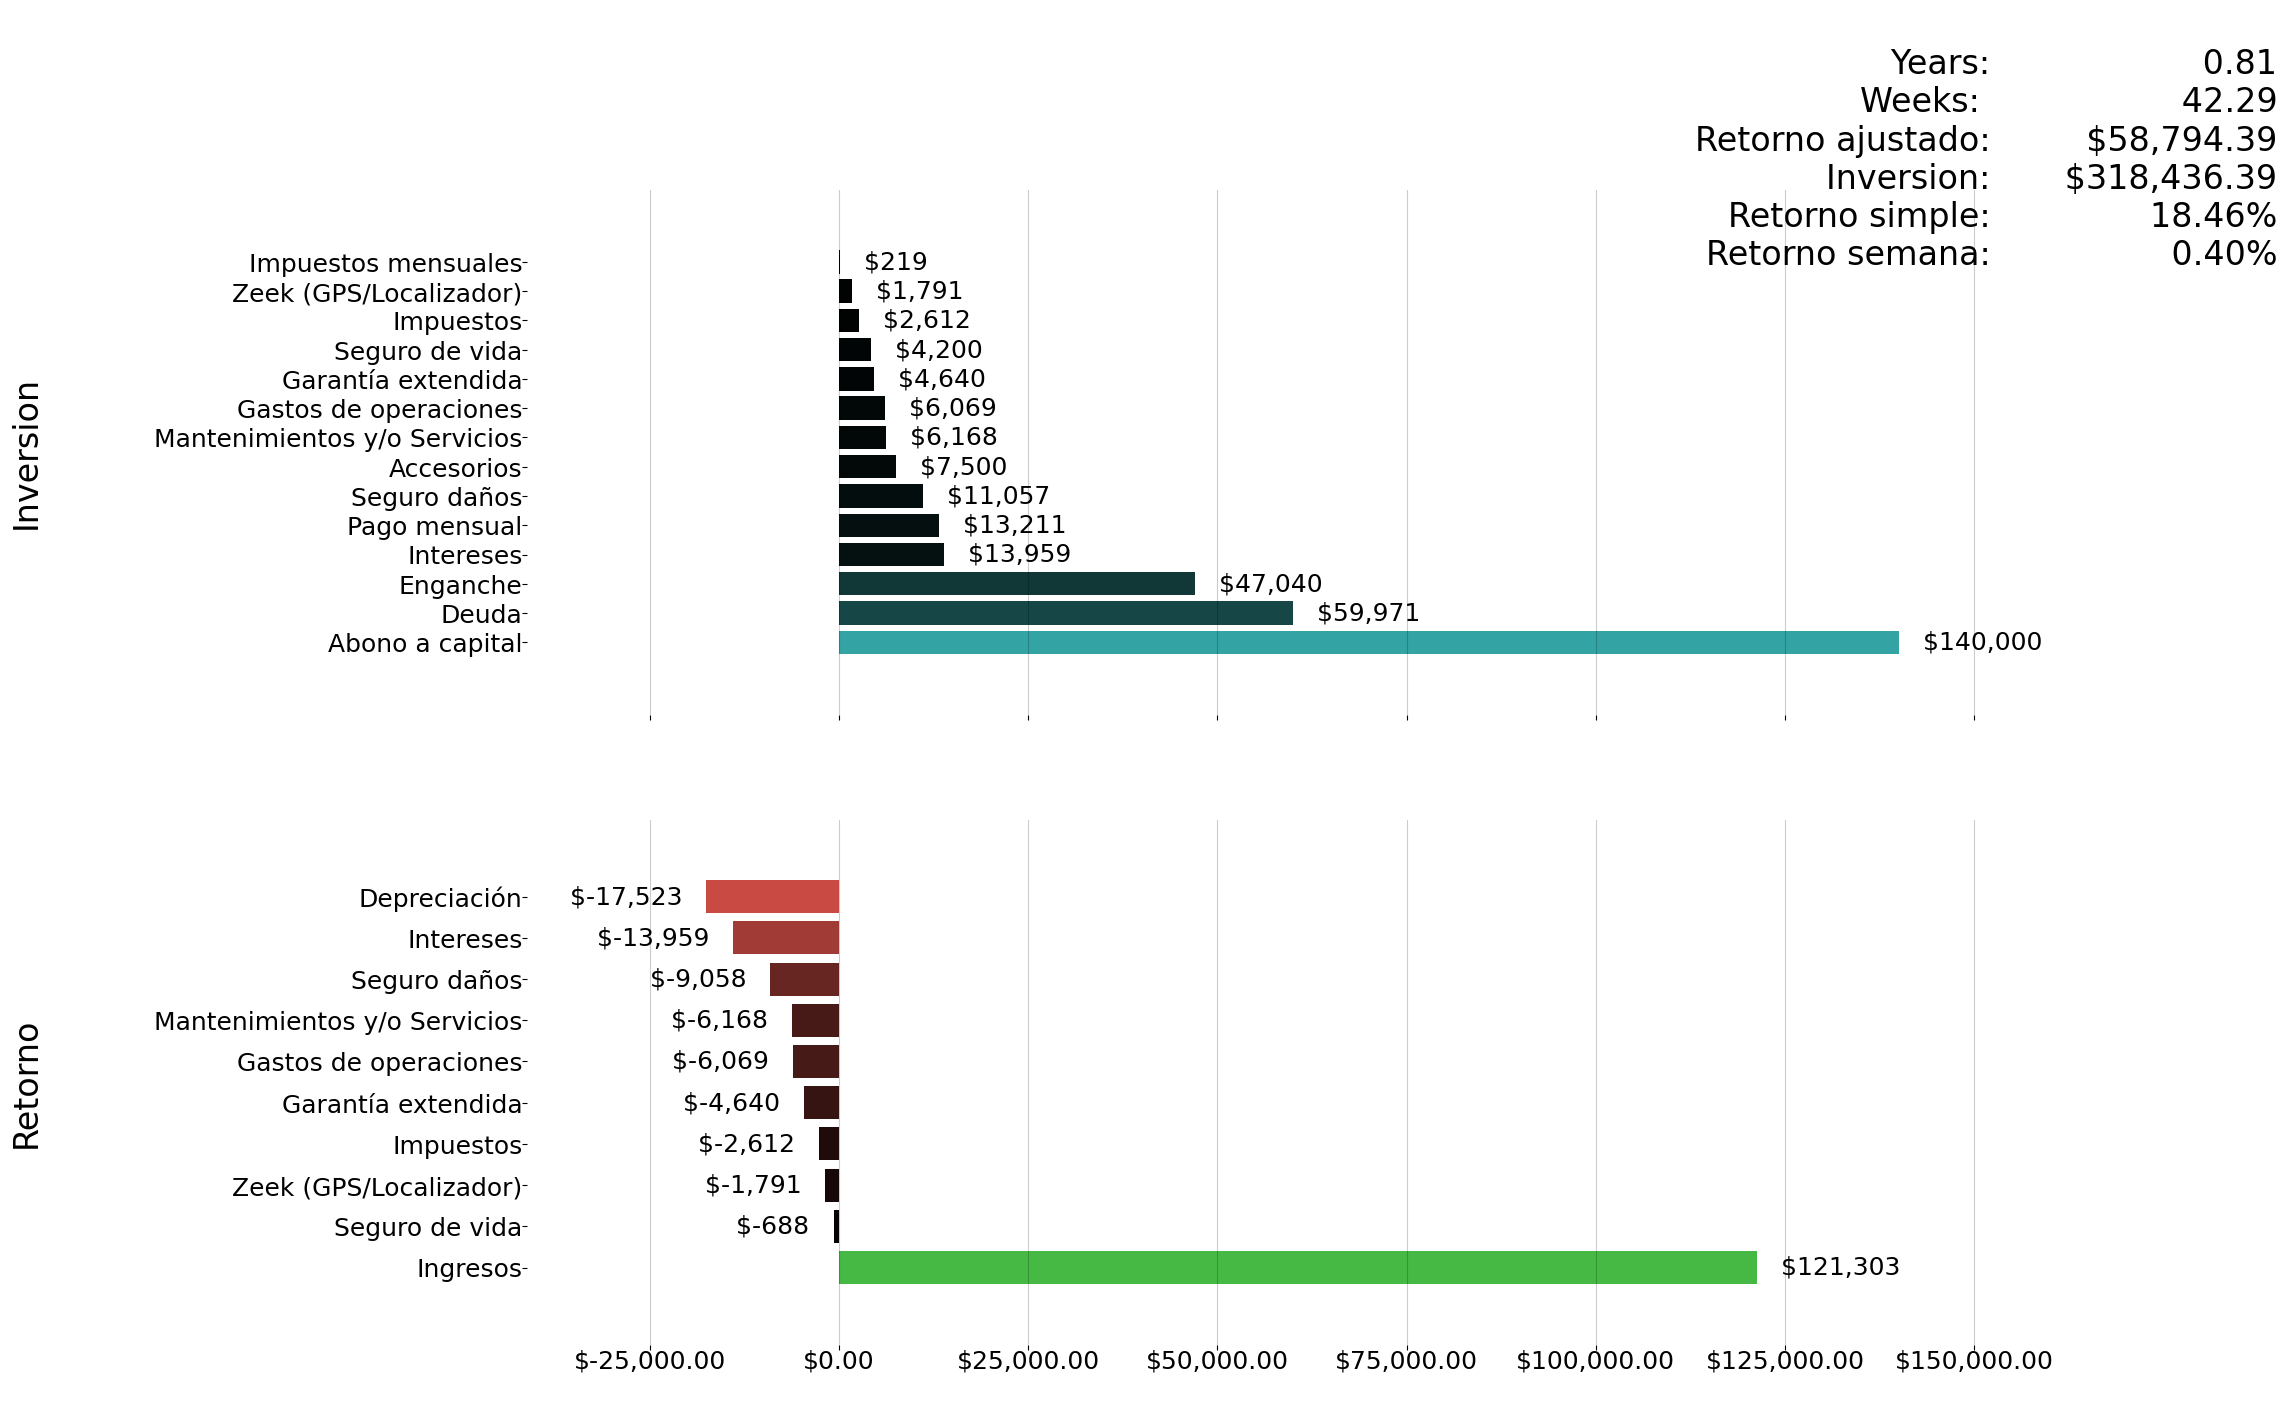

In [14]:
plot_report(
    operations=operations,
    debt=debt,
    car_depreciation=car_depreciation,
    operation_days=operation_days,
    y_ticks_map=y_ticks_map,
)


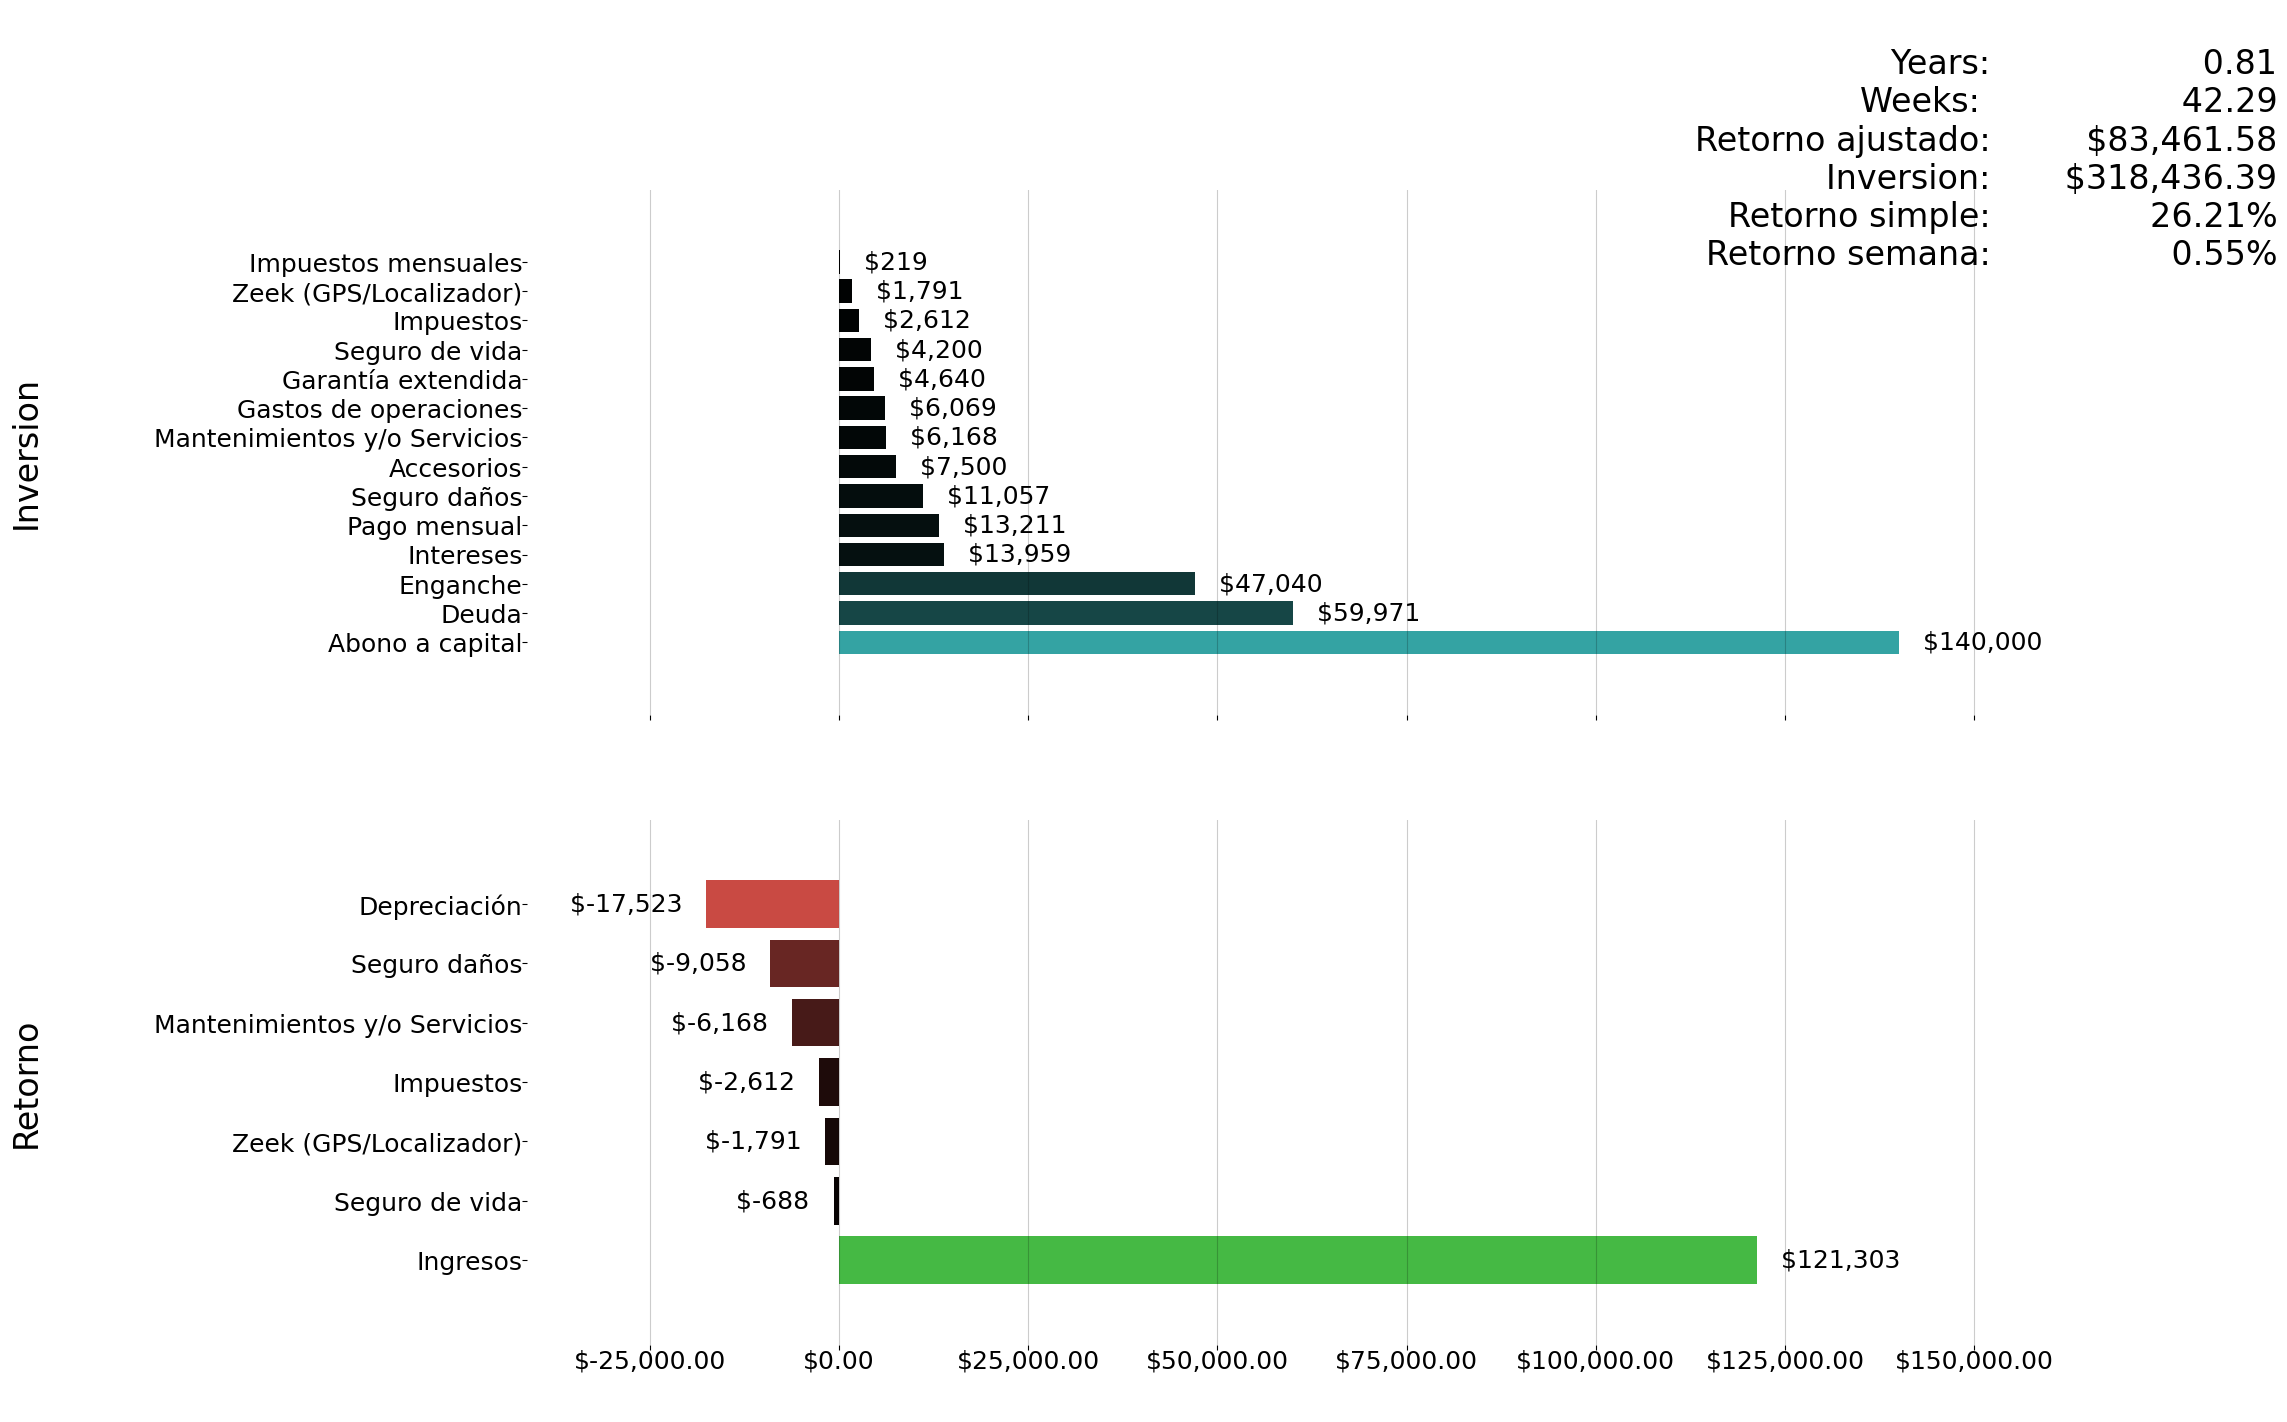

In [15]:
plot_report(
    operations=operations,
    debt=debt,
    car_depreciation=car_depreciation,
    operation_days=operation_days,
    y_ticks_map=y_ticks_map,
    revenue_columns=(
        taxes_cv,
        car_gps_cv,
        life_insurance_cn,
        maintenance_cv,
        car_insurance_cn,
        revenue_cv,
        monthly_car_interest_payment_cv,
        monthly_car_loan_taxes_cv,
        monthly_life_insurance_capital_repayment_cv,
        monthly_life_insurance_interest_payment_cv,
        monthly_life_insurance_loan_taxes_cv,
        monthly_car_insurance_capital_repayment_cv,
        monthly_car_insurance_interest_payment_cv,
        monthly_car_insurance_loan_taxes_cv
    )
)

In [16]:
(1 + 0.26) ** (3)

2.000376